Copyright (c) 2024 Gabriele Mancari Pasi <s323387@studenti.polito.it>\
https://github.com/Gabry323387/CI2024_lab1

# Set Cover Problem
For each istance, Vanilla Hill Climbing has been tried twice: the first time the initial solution includes all sets whereas the second time the starting solution is a valid solution which includes a random 50% of the sets; the goal of each istance is to tweak the initial solution removing a subset at a time: if the generated solution is valid and decreases the total cost of the solution, it will replace the original one.

In [1]:
import numpy as np
from icecream import ic
from itertools import accumulate
from tqdm.auto import tqdm
from matplotlib import pyplot as plt

## Istance 1

In [2]:
UNIVERSE_SIZE = 100
NUM_SETS = 10
DENSITY = 0.2
NUM_STEPS = 1_000

rng = np.random.Generator(np.random.PCG64([UNIVERSE_SIZE, NUM_SETS, int(10_000 * DENSITY)]))

In [3]:
# DON'T EDIT THESE LINES!

SETS = np.random.random((NUM_SETS, UNIVERSE_SIZE)) < DENSITY
for s in range(UNIVERSE_SIZE):
    if not np.any(SETS[:, s]):
        SETS[np.random.randint(NUM_SETS), s] = True
COSTS = np.pow(SETS.sum(axis=1), 1.1)

In [4]:
def valid(solution):
    """Checks wether solution is valid (ie. covers all universe)"""
    return np.all(np.logical_or.reduce(SETS[solution]))


def cost(solution):
    """Returns the cost of a solution (to be minimized)"""
    return COSTS[solution].sum()

In [5]:
def tweak(solution):
    new_solution = solution.copy()
    index = None
    while index is None or np.random.random() < 0.4:
        index = np.random.randint(0, NUM_SETS)
        new_solution[index] = not new_solution[index]
    return new_solution

In [6]:
def full_solution():
    # A dumb solution of "all" sets
    full_solution = np.full(NUM_SETS, True)
    ic(valid(full_solution))
    ic(cost(full_solution))
    return full_solution

In [7]:
def half_solution():
    # A random solution with random 50% of the sets (valid)
    half_solution = rng.random(NUM_SETS) < .5
    while not valid(half_solution):
        half_solution = rng.random(NUM_SETS) < .5
    ic(valid(half_solution))
    ic(cost(half_solution))
    return half_solution

In [8]:
def hill_climbing(initial_solution):
    current_solution = initial_solution
    history = [cost(current_solution)]
    for _ in tqdm(range(NUM_STEPS)):
        solution = tweak(current_solution)
        history.append(cost(solution))
        if valid(solution) and cost(solution) < cost(current_solution):
            current_solution = solution
            ic(cost(current_solution))
    return current_solution, history

ic| valid(full_solution): np.True_
ic| cost(full_solution): np.float64(276.31783796700824)


  0%|          | 0/1000 [00:00<?, ?it/s]

ic| cost(solution): np.float64(276.31783796700824)
ic| history.index(cost(solution)): 0


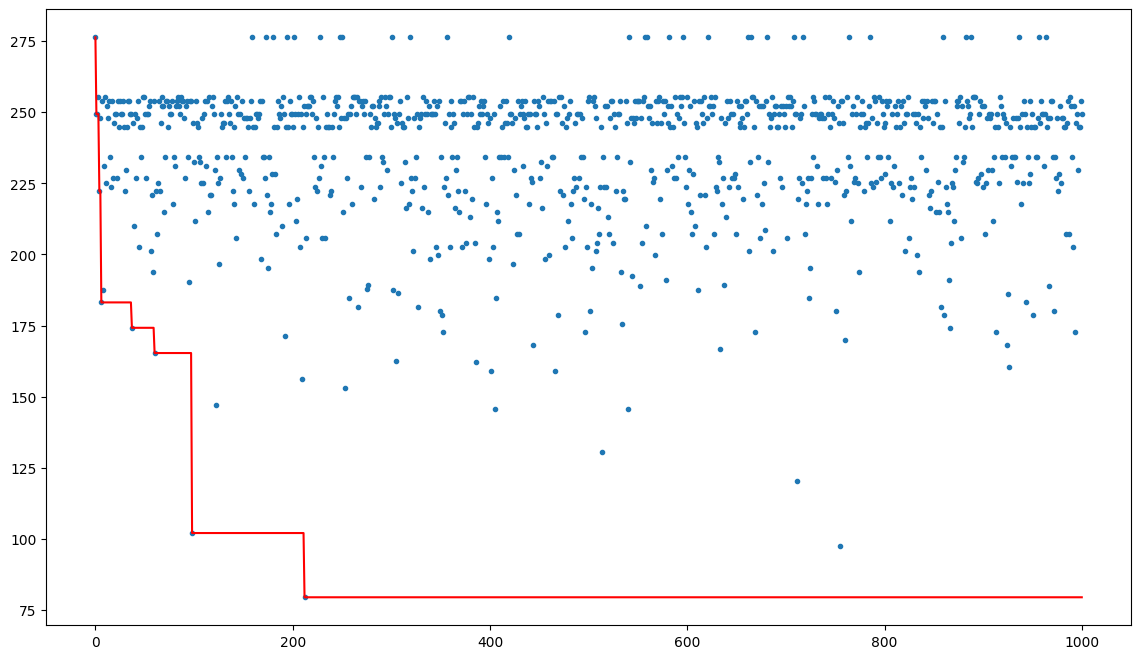

In [9]:
solution, history = hill_climbing(full_solution())
ic(cost(solution))
ic(history.index(cost(solution)))

plt.figure(figsize=(14, 8))
plt.plot(
    range(len(history)),
    list(accumulate(history, min)),
    color="red",
)
_ = plt.scatter(range(len(history)), history, marker=".")

ic| valid(half_solution): np.True_
ic| cost(half_solution): np.float64(276.31783796700824)


  0%|          | 0/1000 [00:00<?, ?it/s]

ic| cost(solution): np.float64(276.31783796700824)
ic| history.index(cost(solution)): 0


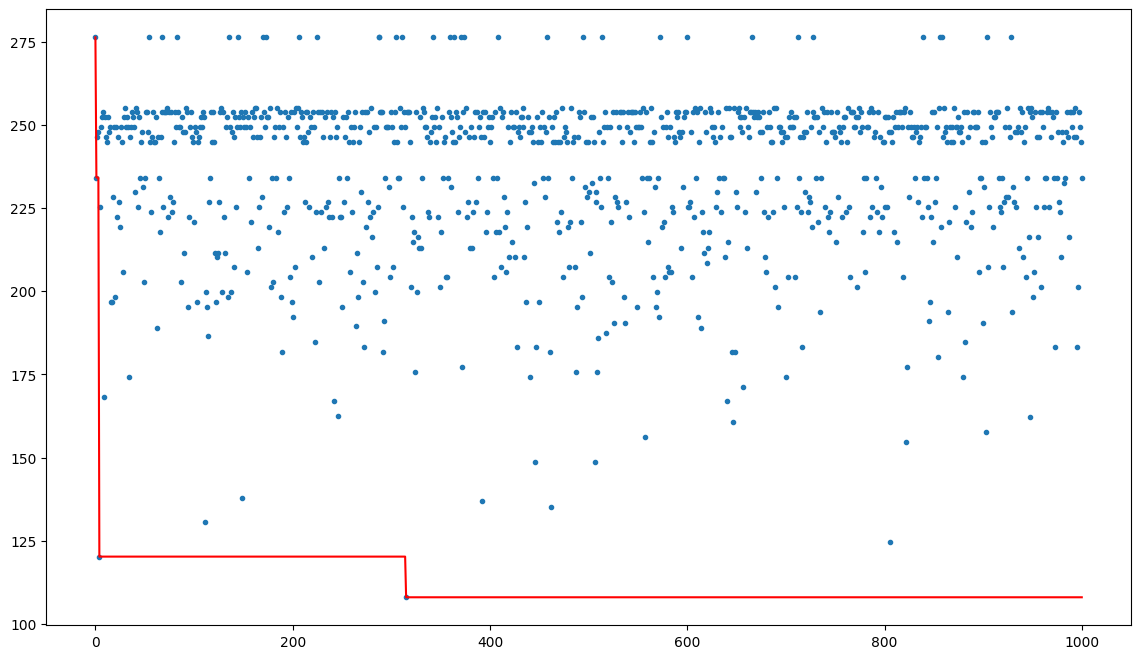

In [10]:
solution, history = hill_climbing(half_solution())
ic(cost(solution))
ic(history.index(cost(solution)))

plt.figure(figsize=(14, 8))
plt.plot(
    range(len(history)),
    list(accumulate(history, min)),
    color="red",
)
_ = plt.scatter(range(len(history)), history, marker=".")

## Istance 2

In [11]:
UNIVERSE_SIZE = 1_000
NUM_SETS = 100
DENSITY = 0.2
NUM_STEPS = 1_000

rng = np.random.Generator(np.random.PCG64([UNIVERSE_SIZE, NUM_SETS, int(10_000 * DENSITY)]))

In [12]:
# DON'T EDIT THESE LINES!

SETS = np.random.random((NUM_SETS, UNIVERSE_SIZE)) < DENSITY
for s in range(UNIVERSE_SIZE):
    if not np.any(SETS[:, s]):
        SETS[np.random.randint(NUM_SETS), s] = True
COSTS = np.pow(SETS.sum(axis=1), 1.1)

ic| valid(full_solution): np.True_
ic| cost(full_solution): np.float64(34310.0289208813)


  0%|          | 0/1000 [00:00<?, ?it/s]

ic| cost(current_solution): np.float64(33285.08145677478)
ic| cost(current_solution): np.float64(32904.025923908666)
ic| cost(current_solution): np.float64(32549.318998007202)
ic| cost(current_solution): np.float64(31469.934008412205)
ic| cost(current_solution): np.float64(30745.46705947753)
ic| cost(current_solution): np.float64(30416.931863072863)
ic| cost(current_solution): np.float64(30080.93771822478)
ic| cost(current_solution): np.float64(29728.106194680087)
ic| cost(current_solution): np.float64(29360.24641541891)
ic| cost(current_solution): np.float64(29014.907403793804)
ic| cost(current_solution): np.float64(28673.309133327115)
ic| cost(current_solution): np.float64(28337.314988479033)
ic| cost(current_solution): np.float64(27976.976459875368)
ic| cost(current_solution): np.float64(27659.600787329065)
ic| cost(current_solution): np.float64(27640.991986428242)
ic| cost(current_solution): np.float64(26981.76479864671)
ic| cost(current_solution): np.float64(26324.690564895835)
ic

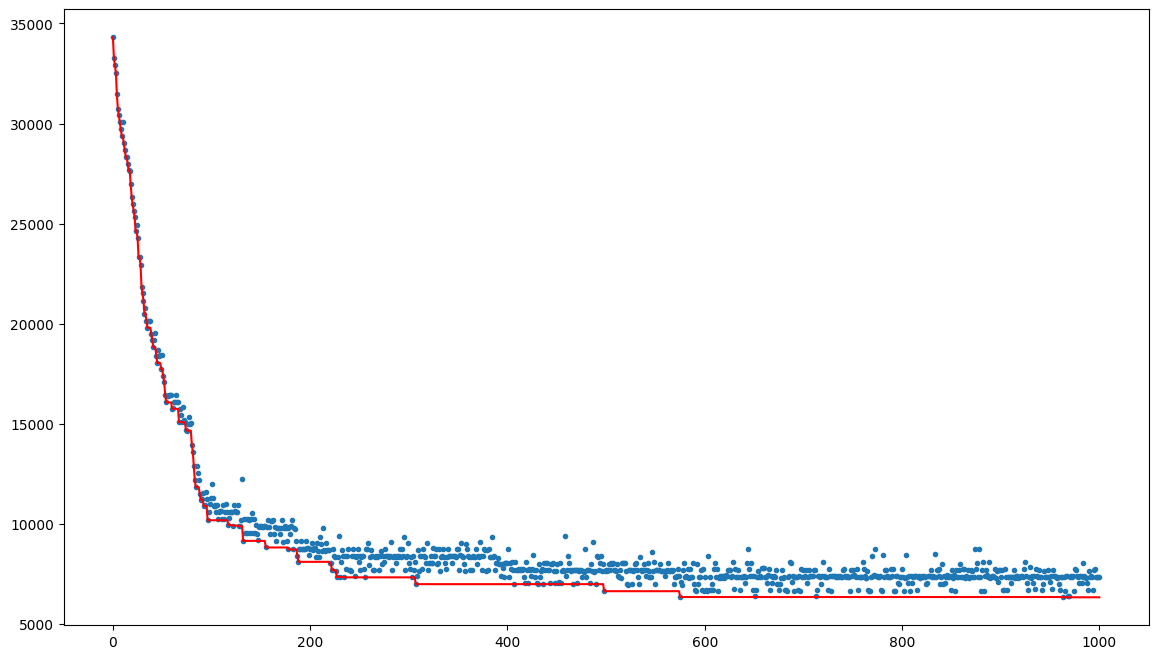

In [13]:
solution, history = hill_climbing(full_solution())
ic(cost(solution))
ic(history.index(cost(solution)))

plt.figure(figsize=(14, 8))
plt.plot(
    range(len(history)),
    list(accumulate(history, min)),
    color="red",
)
_ = plt.scatter(range(len(history)), history, marker=".")

ic|

 valid(half_solution): np.True_
ic| cost(half_solution): np.float64(18820.690259376337)


  0%|          | 0/1000 [00:00<?, ?it/s]

ic| cost(current_solution): np.float64(18464.107029262286)
ic| cost(current_solution): np.float64(17427.907224399274)
ic| cost(current_solution): np.float64(17093.779241601063)
ic| cost(current_solution): np.float64(16444.152432770796)
ic| cost(current_solution): np.float64(16098.813421145693)
ic| cost(current_solution): np.float64(15755.345243064598)
ic| cost(current_solution): np.float64(15083.296603675044)
ic| cost(current_solution): np.float64(14751.033835872846)
ic| cost(current_solution): np.float64(14095.806540067422)
ic| cost(current_solution): np.float64(13680.630420096735)
ic| cost(current_solution): np.float64(13299.574887230616)
ic| cost(current_solution): np.float64(12935.47749887451)
ic| cost(current_solution): np.float64(12550.644043582046)
ic| cost(current_solution): np.float64(12188.426528365479)
ic| cost(current_solution): np.float64(11900.632822470701)
ic| cost(current_solution): np.float64(11894.98792119431)
ic| cost(current_solution): np.float64(11527.128141933132)

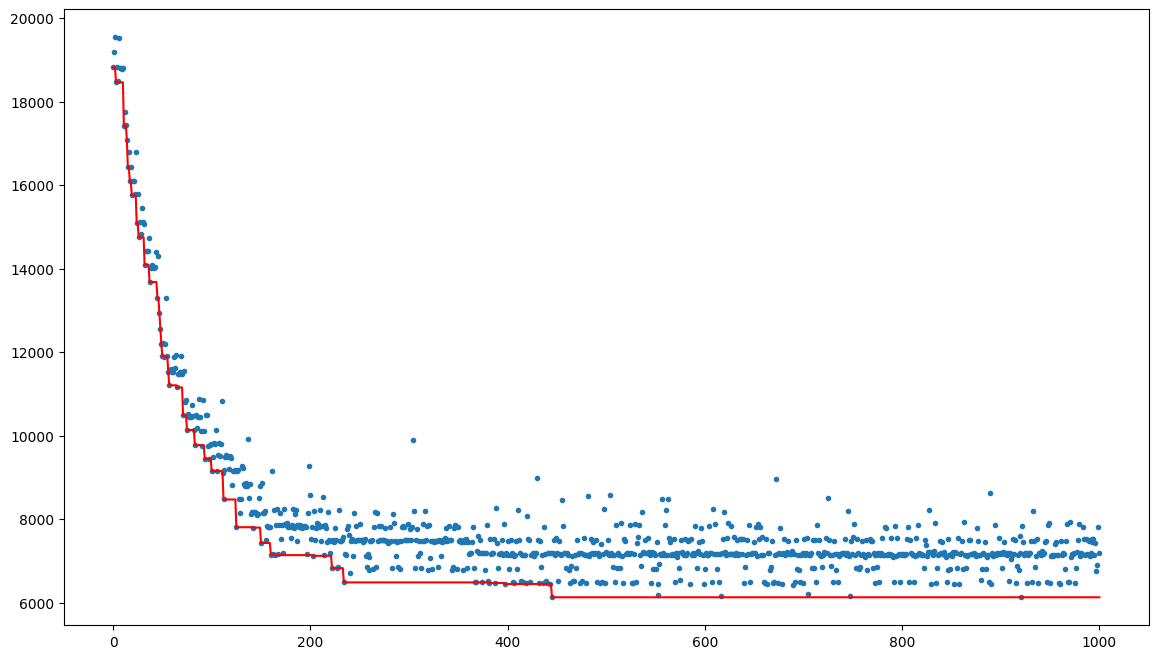

In [14]:
solution, history = hill_climbing(half_solution())
ic(cost(solution))
ic(history.index(cost(solution)))

plt.figure(figsize=(14, 8))
plt.plot(
    range(len(history)),
    list(accumulate(history, min)),
    color="red",
)
_ = plt.scatter(range(len(history)), history, marker=".")

## Istance 3

In [15]:
UNIVERSE_SIZE = 10_000
NUM_SETS = 1_000
DENSITY = 0.2
NUM_STEPS = 1_000

rng = np.random.Generator(np.random.PCG64([UNIVERSE_SIZE, NUM_SETS, int(10_000 * DENSITY)]))

In [16]:
# DON'T EDIT THESE LINES!

SETS = np.random.random((NUM_SETS, UNIVERSE_SIZE)) < DENSITY
for s in range(UNIVERSE_SIZE):
    if not np.any(SETS[:, s]):
        SETS[np.random.randint(NUM_SETS), s] = True
COSTS = np.pow(SETS.sum(axis=1), 1.1)

ic| valid(full_solution): np.True_
ic| cost(full_solution): np.float64(4278136.854166391)


  0%|          | 0/1000 [00:00<?, ?it/s]

ic| cost(current_solution): np.float64(4265110.613326436)
ic| cost(current_solution): np.float64(4260850.138254694)
ic| cost(current_solution): np.float64(4247894.514486057)
ic| cost(current_solution): np.float64(4239255.916184069)
ic| cost(current_solution): np.float64(4234967.214734407)
ic| cost(current_solution): np.float64(4230781.926688135)
ic| cost(current_solution): np.float64(4226490.872276269)
ic| cost(current_solution): np.float64(4213360.829995044)
ic| cost(current_solution): np.float64(4209025.047074159)
ic| cost(current_solution): np.float64(4178961.1270963056)
ic| cost(current_solution): np.float64(4174604.142310261)
ic| cost(current_solution): np.float64(4166097.2989901374)
ic| cost(current_solution): np.float64(4161719.102955472)
ic| cost(current_solution): np.float64(4157343.2641884307)
ic| cost(current_solution): np.float64(4153061.6209210646)
ic| cost(current_solution): np.float64(4148998.24950481)
ic| cost(current_solution): np.float64(4131772.7590841865)
ic| cost(c

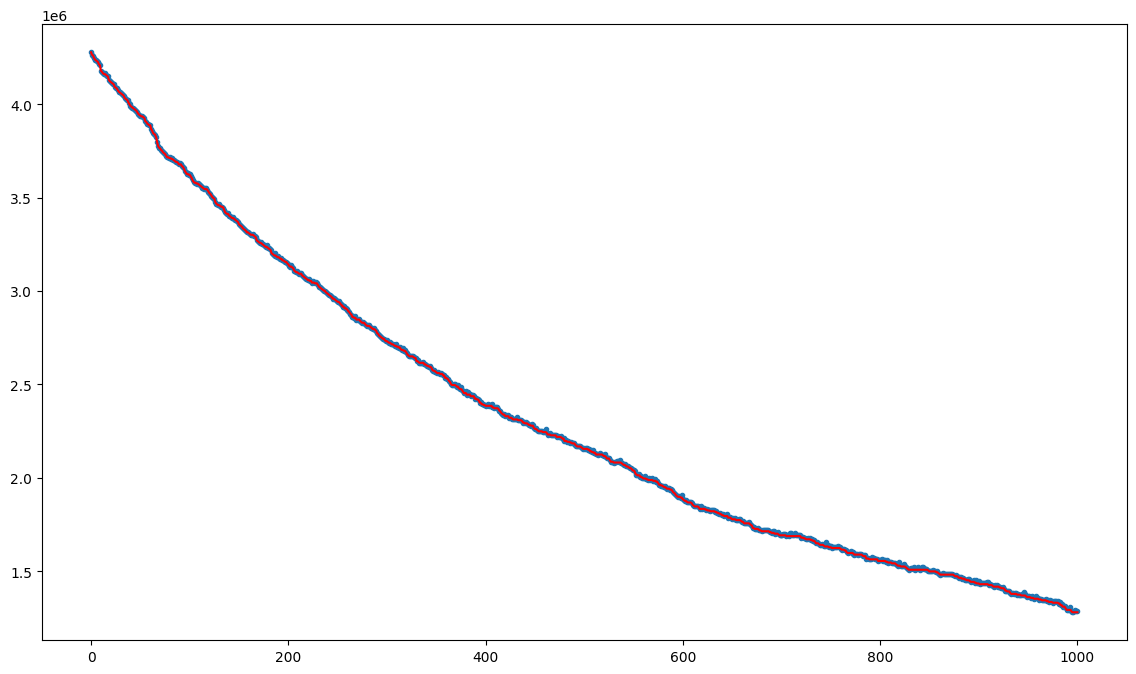

In [17]:
solution, history = hill_climbing(full_solution())
ic(cost(solution))
ic(history.index(cost(solution)))

plt.figure(figsize=(14, 8))
plt.plot(
    range(len(history)),
    list(accumulate(history, min)),
    color="red",
)
_ = plt.scatter(range(len(history)), history, marker=".")

ic| valid(half_solution): np.True_
ic| cost(half_solution): np.float64(2138330.4821163467)


  0%|          | 0/1000 [00:00<?, ?it/s]

ic| cost(current_solution): np.float64(2134053.5437163822)
ic| cost(current_solution): np.float64(2129715.4054972464)
ic| cost(current_solution): np.float64(2125504.285648304)
ic| cost(current_solution): np.float64(2121288.4675573106)
ic| cost(current_solution): np.float64(2121201.464666974)
ic| cost(current_solution): np.float64(2116959.7977471524)
ic| cost(current_solution): np.float64(2116834.814027955)
ic| cost(current_solution): np.float64(2116745.4844107768)
ic| cost(current_solution): np.float64(2103926.324469394)
ic| cost(current_solution): np.float64(2099623.5034880633)
ic| cost(current_solution): np.float64(2099562.2310910258)
ic| cost(current_solution): np.float64(2095155.7388593098)
ic| cost(current_solution): np.float64(2086557.0555306836)
ic| cost(current_solution): np.float64(2082322.439715452)
ic| cost(current_solution): np.float64(2082200.2671777443)
ic| cost(current_solution): np.float64(2077873.904286263)
ic| cost(current_solution): np.float64(2069312.9107694868)
ic|

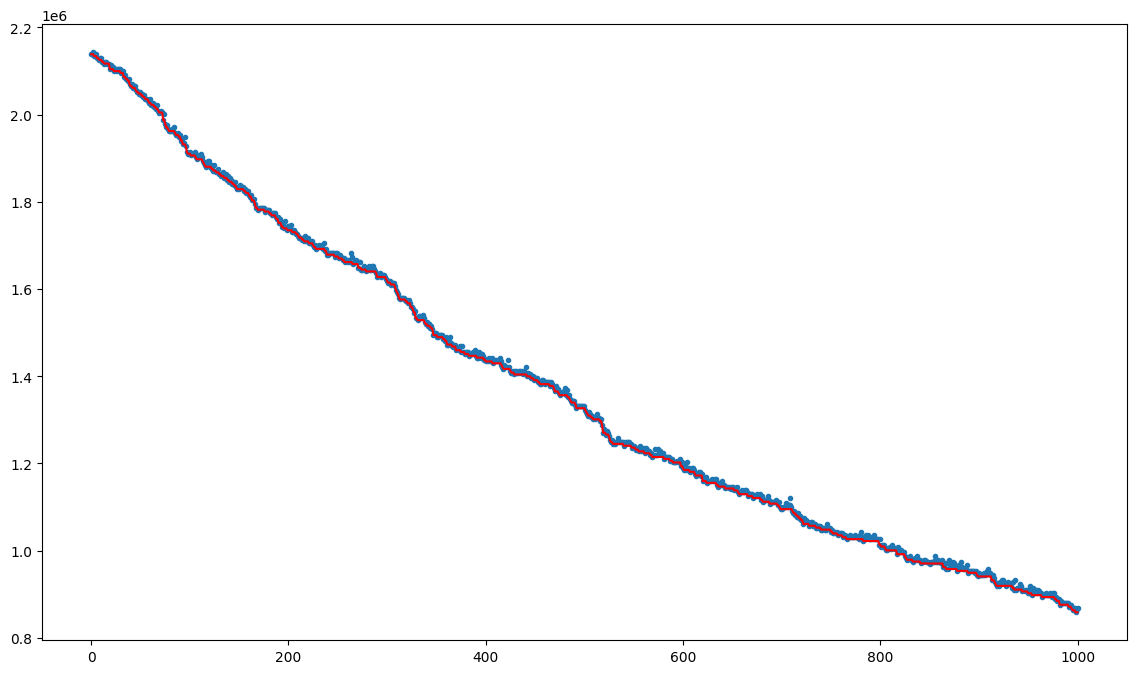

In [18]:
solution, history = hill_climbing(half_solution())
ic(cost(solution))
ic(history.index(cost(solution)))

plt.figure(figsize=(14, 8))
plt.plot(
    range(len(history)),
    list(accumulate(history, min)),
    color="red",
)
_ = plt.scatter(range(len(history)), history, marker=".")

## Istance 4

In [19]:
UNIVERSE_SIZE = 100_000
NUM_SETS = 10_000
DENSITY = 0.1
NUM_STEPS = 1_000

rng = np.random.Generator(np.random.PCG64([UNIVERSE_SIZE, NUM_SETS, int(10_000 * DENSITY)]))

In [20]:
# DON'T EDIT THESE LINES!

SETS = np.random.random((NUM_SETS, UNIVERSE_SIZE)) < DENSITY
for s in range(UNIVERSE_SIZE):
    if not np.any(SETS[:, s]):
        SETS[np.random.randint(NUM_SETS), s] = True
COSTS = np.pow(SETS.sum(axis=1), 1.1)

ic| valid(full_solution): np.True_
ic| cost(full_solution): np.float64(251202814.1776341)


  0%|          | 0/1000 [00:00<?, ?it/s]

ic| cost(current_solution): np.float64(251178043.24061143)
ic| cost(current_solution): np.float64(251152634.1015764)
ic| cost(current_solution): np.float64(251127490.36846688)
ic| cost(current_solution): np.float64(251102415.70981455)
ic| cost(current_solution): np.float64(251051937.50675073)
ic| cost(current_solution): np.float64(251026672.1607108)
ic| cost(current_solution): np.float64(251001489.7383657)
ic| cost(current_solution): np.float64(250976522.80131906)
ic| cost(current_solution): np.float64(250951420.51495695)
ic| cost(current_solution): np.float64(250925526.9154747)
ic| cost(current_solution): np.float64(250900358.31133452)
ic| cost(current_solution): np.float64(250875628.76477182)
ic| cost(current_solution): np.float64(250850438.05117285)
ic| cost(current_solution): np.float64(250799807.8222512)
ic| cost(current_solution): np.float64(250749804.7748813)
ic| cost(current_solution): np.float64(250699586.3617265)
ic| cost(current_solution): np.float64(250649108.04867965)
ic| 

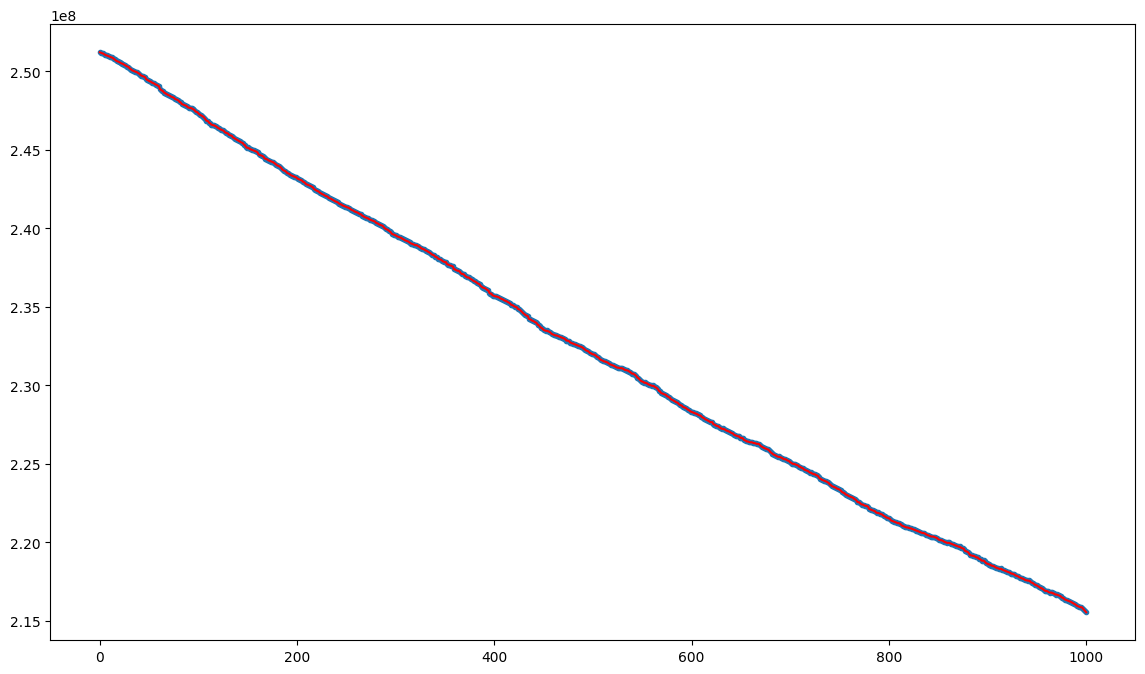

In [21]:
solution, history = hill_climbing(full_solution())
ic(cost(solution))
ic(history.index(cost(solution)))

plt.figure(figsize=(14, 8))
plt.plot(
    range(len(history)),
    list(accumulate(history, min)),
    color="red",
)
_ = plt.scatter(range(len(history)), history, marker=".")

ic| valid(half_solution): np.True_
ic| cost(half_solution): np.float64(124566348.31796992)


  0%|          | 0/1000 [00:00<?, ?it/s]

ic| cost(current_solution): np.float64(124540941.94488388)
ic| cost(current_solution): np.float64(124515543.86948058)
ic| cost(current_solution): np.float64(124440485.3297467)
ic| cost(current_solution): np.float64(124415529.43868431)
ic| cost(current_solution): np.float64(124365661.81111525)
ic| cost(current_solution): np.float64(124290095.16047111)
ic| cost(current_solution): np.float64(124265092.32090807)
ic| cost(current_solution): np.float64(124239992.7974414)
ic| cost(current_solution): np.float64(124214815.90246099)
ic| cost(current_solution): np.float64(124164513.98589826)
ic| cost(current_solution): np.float64(124139602.21094903)
ic| cost(current_solution): np.float64(124114955.42640692)
ic| cost(current_solution): np.float64(124089590.53926954)
ic| cost(current_solution): np.float64(124039485.30763227)
ic| cost(current_solution): np.float64(124014175.72549774)
ic| cost(current_solution): np.float64(123989294.38319585)
ic| cost(current_solution): np.float64(123964095.37809496)

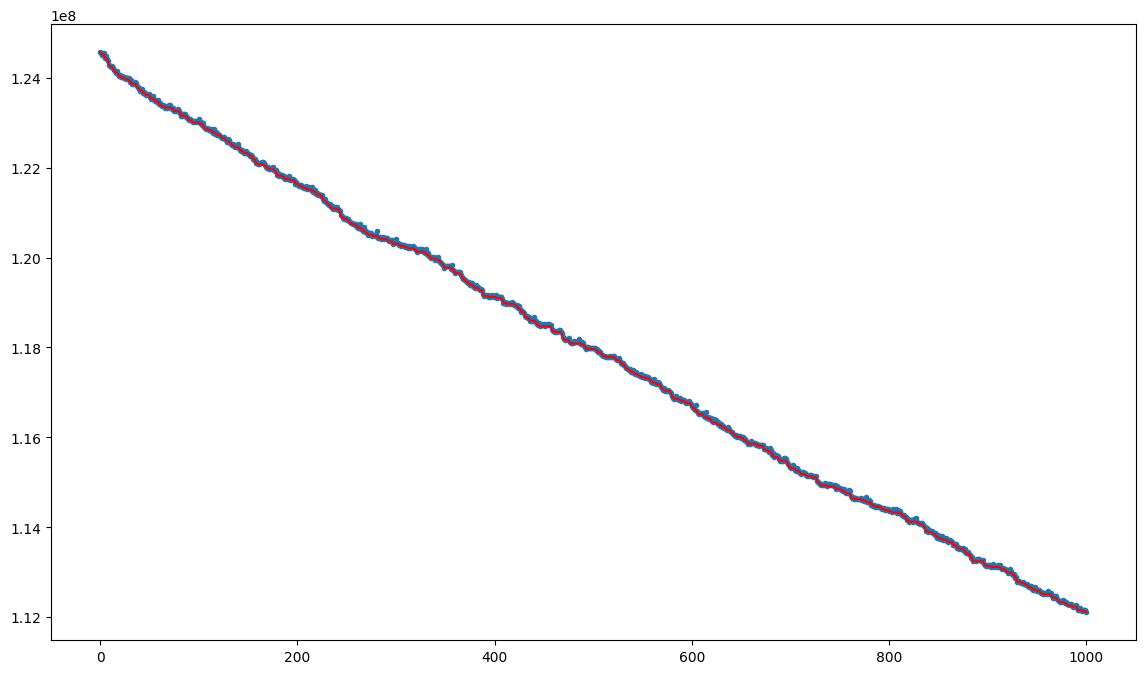

In [22]:
solution, history = hill_climbing(half_solution())
ic(cost(solution))
ic(history.index(cost(solution)))

plt.figure(figsize=(14, 8))
plt.plot(
    range(len(history)),
    list(accumulate(history, min)),
    color="red",
)
_ = plt.scatter(range(len(history)), history, marker=".")

## Istance 5

In [23]:
UNIVERSE_SIZE = 100_000
NUM_SETS = 10_000
DENSITY = 0.2
NUM_STEPS = 1_000

rng = np.random.Generator(np.random.PCG64([UNIVERSE_SIZE, NUM_SETS, int(10_000 * DENSITY)]))

In [24]:
# DON'T EDIT THESE LINES!

SETS = np.random.random((NUM_SETS, UNIVERSE_SIZE)) < DENSITY
for s in range(UNIVERSE_SIZE):
    if not np.any(SETS[:, s]):
        SETS[np.random.randint(NUM_SETS), s] = True
COSTS = np.pow(SETS.sum(axis=1), 1.1)

ic| valid(full_solution): np.True_
ic| cost(full_solution): np.float64(538328964.3106511)


  0%|          | 0/1000 [00:00<?, ?it/s]

ic| cost(current_solution): np.float64(538275162.3043033)
ic| cost(current_solution): np.float64(538221768.79986)
ic| cost(current_solution): np.float64(538006201.9452083)
ic| cost(current_solution): np.float64(537951845.939275)
ic| cost(current_solution): np.float64(537843699.9034932)
ic| cost(current_solution): np.float64(537790625.8982307)
ic| cost(current_solution): np.float64(537737176.1675863)
ic| cost(current_solution): np.float64(537683676.1247301)
ic| cost(current_solution): np.float64(537630182.0011808)
ic| cost(current_solution): np.float64(537576297.0758985)
ic| cost(current_solution): np.float64(537522477.302185)
ic| cost(current_solution): np.float64(537469240.6107893)
ic| cost(current_solution): np.float64(537415480.0595537)
ic| cost(current_solution): np.float64(537361612.9035916)
ic| cost(current_solution): np.float64(537307630.2375296)
ic| cost(current_solution): np.float64(537092022.0742683)
ic| cost(current_solution): np.float64(536984302.569704)
ic| cost(current_so

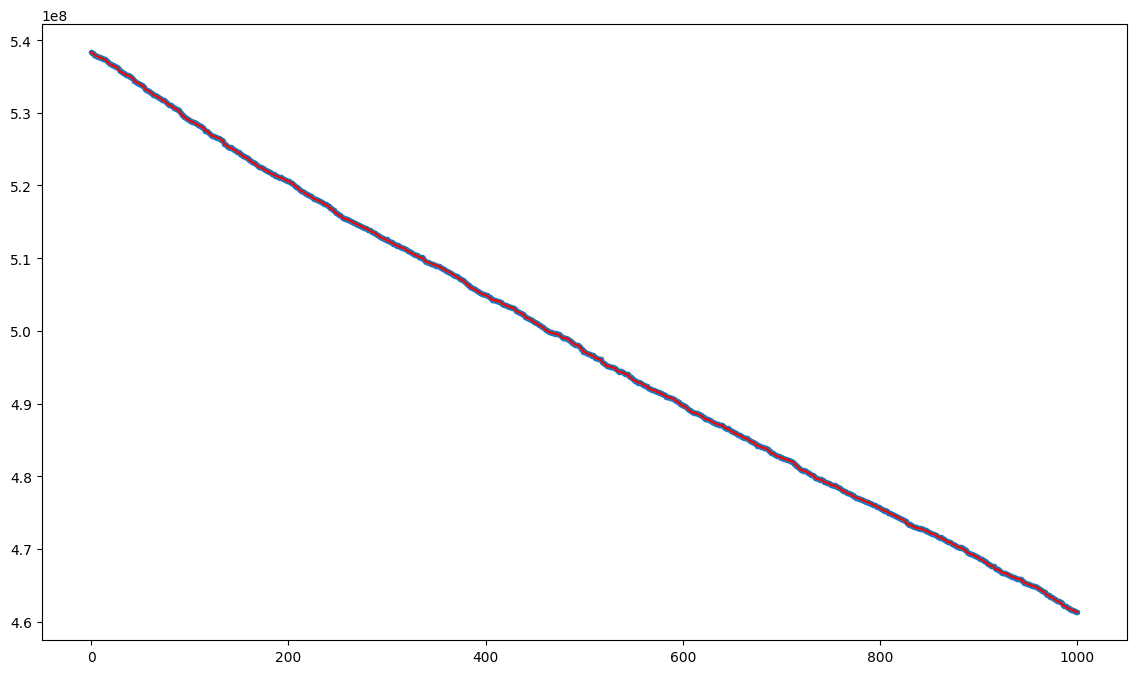

In [25]:
solution, history = hill_climbing(full_solution())
ic(cost(solution))
ic(history.index(cost(solution)))

plt.figure(figsize=(14, 8))
plt.plot(
    range(len(history)),
    list(accumulate(history, min)),
    color="red",
)
_ = plt.scatter(range(len(history)), history, marker=".")

ic| valid(half_solution): np.True_
ic| cost(half_solution): np.float64(268460848.7224632)


  0%|          | 0/1000 [00:00<?, ?it/s]

ic| cost(current_solution): np.float64(268407212.5191219)
ic| cost(current_solution): np.float64(268352972.0957551)
ic| cost(current_solution): np.float64(268352684.7197628)
ic| cost(current_solution): np.float64(268298616.14700398)
ic| cost(current_solution): np.float64(268244532.761491)
ic| cost(current_solution): np.float64(268190795.89758644)
ic| cost(current_solution): np.float64(268190668.6417701)
ic| cost(current_solution): np.float64(268137159.71984154)
ic| cost(current_solution): np.float64(268083556.079478)
ic| cost(current_solution): np.float64(268029611.91928163)
ic| cost(current_solution): np.float64(267975901.50824478)
ic| cost(current_solution): np.float64(267922712.14839202)
ic| cost(current_solution): np.float64(267814693.45759055)
ic| cost(current_solution): np.float64(267814643.1418358)
ic| cost(current_solution): np.float64(267761187.4923311)
ic| cost(current_solution): np.float64(267707646.01265836)
ic| cost(current_solution): np.float64(267600228.4761386)
ic| cost

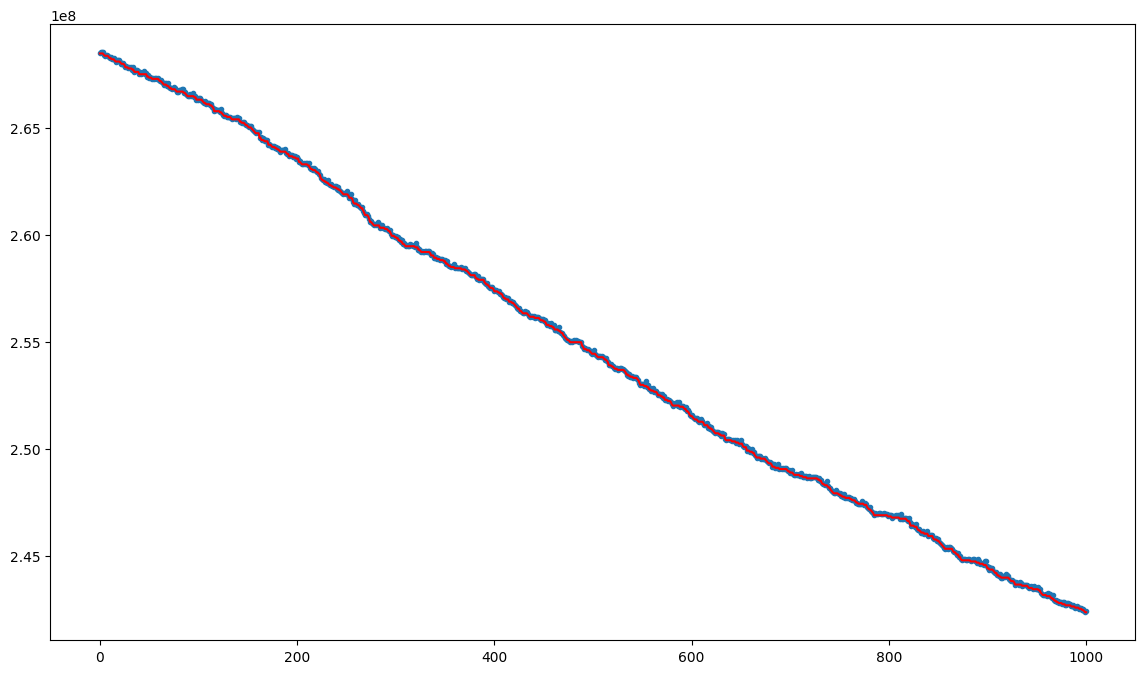

In [26]:
solution, history = hill_climbing(half_solution())
ic(cost(solution))
ic(history.index(cost(solution)))

plt.figure(figsize=(14, 8))
plt.plot(
    range(len(history)),
    list(accumulate(history, min)),
    color="red",
)
_ = plt.scatter(range(len(history)), history, marker=".")

## Istance 6

In [27]:
UNIVERSE_SIZE = 100_000
NUM_SETS = 10_000
DENSITY = 0.3
NUM_STEPS = 1_000

rng = np.random.Generator(np.random.PCG64([UNIVERSE_SIZE, NUM_SETS, int(10_000 * DENSITY)]))

In [28]:
# DON'T EDIT THESE LINES!

SETS = np.random.random((NUM_SETS, UNIVERSE_SIZE)) < DENSITY
for s in range(UNIVERSE_SIZE):
    if not np.any(SETS[:, s]):
        SETS[np.random.randint(NUM_SETS), s] = True
COSTS = np.pow(SETS.sum(axis=1), 1.1)

ic| valid(full_solution): np.True_
ic| cost(full_solution): np.float64(841105807.314417)


  0%|          | 0/1000 [00:00<?, ?it/s]

ic| cost(current_solution): np.float64(841022569.3336709)
ic| cost(current_solution): np.float64(840853929.21976)
ic| cost(current_solution): np.float64(840769232.761871)
ic| cost(current_solution): np.float64(840684594.9340458)
ic| cost(current_solution): np.float64(840516753.5638161)
ic| cost(current_solution): np.float64(840179593.2736601)
ic| cost(current_solution): np.float64(839926179.2829889)
ic| cost(current_solution): np.float64(839674637.6847315)
ic| cost(current_solution): np.float64(839506305.6793189)
ic| cost(current_solution): np.float64(839421920.8441298)
ic| cost(current_solution): np.float64(839337332.3861265)
ic| cost(current_solution): np.float64(839254186.8313403)
ic| cost(current_solution): np.float64(839170483.4984245)
ic| cost(current_solution): np.float64(839086465.6884298)
ic| cost(current_solution): np.float64(838834128.0799704)
ic| cost(current_solution): np.float64(838581975.1876588)
ic| cost(current_solution): np.float64(838412844.553932)
ic| cost(current_s

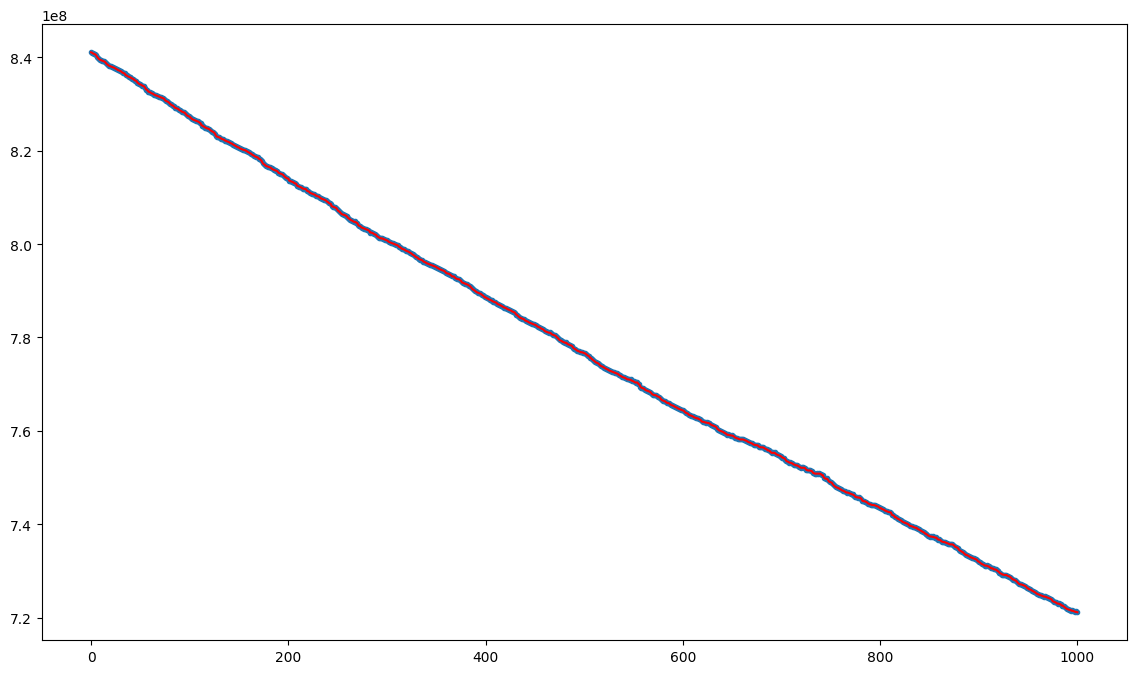

In [29]:
solution, history = hill_climbing(full_solution())
ic(cost(solution))
ic(history.index(cost(solution)))

plt.figure(figsize=(14, 8))
plt.plot(
    range(len(history)),
    list(accumulate(history, min)),
    color="red",
)
_ = plt.scatter(range(len(history)), history, marker=".")

ic| valid(half_solution): np.True_
ic| cost(half_solution): np.float64(423517724.3655367)


  0%|          | 0/1000 [00:00<?, ?it/s]

ic| cost(current_solution): np.float64(423433169.84776664)
ic| cost(current_solution): np.float64(423265090.9905646)
ic| cost(current_solution): np.float64(423264643.8599618)
ic| cost(current_solution): np.float64(423180206.58073854)
ic| cost(current_solution): np.float64(423012451.45016146)
ic| cost(current_solution): np.float64(422844819.6752348)
ic| cost(current_solution): np.float64(422844585.32610404)
ic| cost(current_solution): np.float64(422844026.71445525)
ic| cost(current_solution): np.float64(422842962.68571866)
ic| cost(current_solution): np.float64(422759589.13002205)
ic| cost(current_solution): np.float64(422759101.93217856)
ic| cost(current_solution): np.float64(422674754.11452377)
ic| cost(current_solution): np.float64(422590363.109602)
ic| cost(current_solution): np.float64(422507011.12398905)
ic| cost(current_solution): np.float64(422422795.9403681)
ic| cost(current_solution): np.float64(422254661.6373473)
ic| cost(current_solution): np.float64(422086635.133342)
ic| co

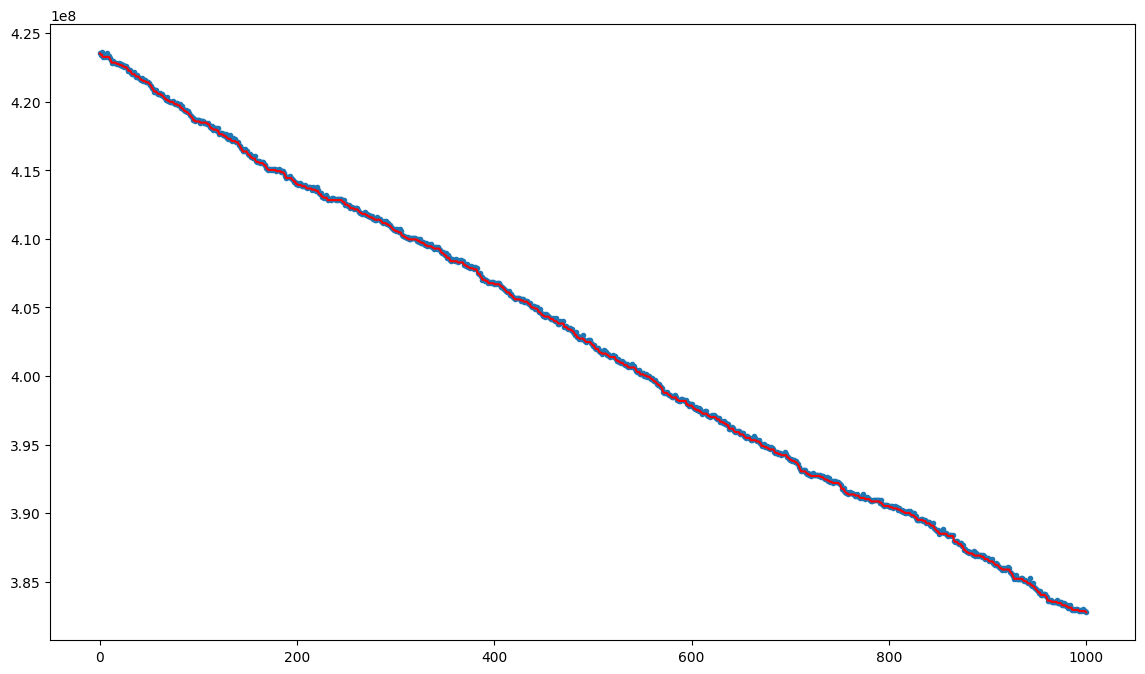

In [30]:
solution, history = hill_climbing(half_solution())
ic(cost(solution))
ic(history.index(cost(solution)))

plt.figure(figsize=(14, 8))
plt.plot(
    range(len(history)),
    list(accumulate(history, min)),
    color="red",
)
_ = plt.scatter(range(len(history)), history, marker=".")

## Istance 6 (using fitness and single/multiple mutation)
Trying a different approach, the last istance has been tried again but this time fitness was computed to quantify the quality of the solution (in this case, the aim is to maximize fitness) and two different tweak functions were implemented: single mutation and multiple mutation; the first one removes one subset at a time and the second one makes larger steps (but with a low probability). The initial solution is the one which includes a valid solution with random 50% of the sets.

In [31]:
def fitness(solution):
    return (-cost(solution))

def single_mutation(solution):
    new_solution = solution.copy()
    index = None
    while index is None or np.random.random() < 0.4:
        index = np.random.randint(0, NUM_SETS)
        new_solution[index] = not new_solution[index]
    return new_solution

def multiple_mutation(solution):
    mask = rng.random(NUM_SETS) < 0.01
    return np.logical_xor(solution, mask)

In [32]:
def hill_climbing_single_mutation(initial_solution):
    current_solution = initial_solution
    history = [fitness(current_solution)]

    tweak = single_mutation

    for _ in tqdm(range(NUM_STEPS)):
        solution = tweak(current_solution)
        history.append(fitness(solution))
        if valid(solution) and fitness(solution) > fitness(current_solution):
            current_solution = solution
            ic(fitness(current_solution))
    return current_solution, history

In [33]:
def hill_climbing_multiple_mutation(initial_solution):
    current_solution = initial_solution
    history = [fitness(current_solution)]

    tweak = multiple_mutation

    for _ in tqdm(range(NUM_STEPS)):
        solution = tweak(current_solution)
        history.append(fitness(solution))
        if valid(solution) and fitness(solution) > fitness(current_solution):
            current_solution = solution
            ic(fitness(current_solution))
    return current_solution, history

ic| valid(half_solution): np.True_
ic| cost(half_solution): np.float64(417064040.92367375)


  0%|          | 0/1000 [00:00<?, ?it/s]

ic| fitness(current_solution): np.float64(-416979566.6233492)
ic| fitness(current_solution): np.float64(-416896023.5707795)
ic| fitness(current_solution): np.float64(-416728437.88910615)
ic| fitness(current_solution): np.float64(-416644009.86492765)
ic| fitness(current_solution): np.float64(-416643161.69202995)
ic| fitness(current_solution): np.float64(-416559060.6201712)
ic| fitness(current_solution): np.float64(-416474752.9031788)
ic| fitness(current_solution): np.float64(-416306106.61431384)
ic| fitness(current_solution): np.float64(-416222116.55660725)
ic| fitness(current_solution): np.float64(-416138391.64535886)
ic| fitness(current_solution): np.float64(-416054281.32171917)
ic| fitness(current_solution): np.float64(-415969628.0652877)
ic| fitness(current_solution): np.float64(-415885699.67634773)
ic| fitness(current_solution): np.float64(-415717565.3226381)
ic| fitness(current_solution): np.float64(-415716442.9704426)
ic| fitness(current_solution): np.float64(-415632718.1367769)


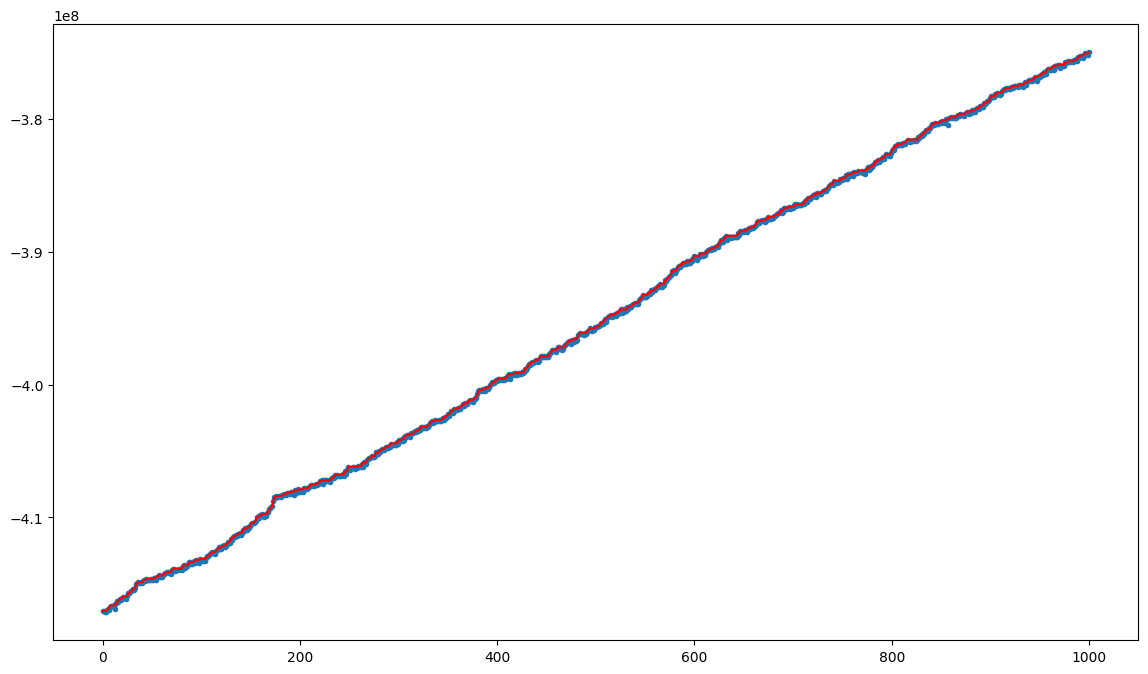

In [34]:
solution, history = hill_climbing_single_mutation(half_solution())
ic(fitness(solution))
ic(history.index(fitness(solution)))

plt.figure(figsize=(14, 8))
plt.plot(
    range(len(history)),
    list(accumulate(history, max)),
    color="red",
)
_ = plt.scatter(range(len(history)), history, marker=".")

ic| valid(half_solution): np.True_
ic| cost(half_solution): np.float64(429127782.32678056)


  0%|          | 0/1000 [00:00<?, ?it/s]

ic| fitness(current_solution): np.float64(-428793249.3525392)
ic| fitness(current_solution): np.float64(-428709299.2162747)
ic| fitness(current_solution): np.float64(-428039707.2277274)
ic| fitness(current_solution): np.float64(-427189080.2661157)
ic| fitness(current_solution): np.float64(-426098416.64381284)
ic| fitness(current_solution): np.float64(-425176074.5842782)
ic| fitness(current_solution): np.float64(-425090688.18211275)
ic| fitness(current_solution): np.float64(-423999828.19445544)
ic| fitness(current_solution): np.float64(-423742504.1613285)
ic| fitness(current_solution): np.float64(-423566490.7754878)
ic| fitness(current_solution): np.float64(-422392574.3784814)
ic| fitness(current_solution): np.float64(-422144317.42568684)
ic| fitness(current_solution): np.float64(-420961426.3655471)
ic| fitness(current_solution): np.float64(-420196973.79273564)
ic| fitness(current_solution): np.float64(-419693851.9207772)
ic| fitness(current_solution): np.float64(-418436905.45015705)
ic

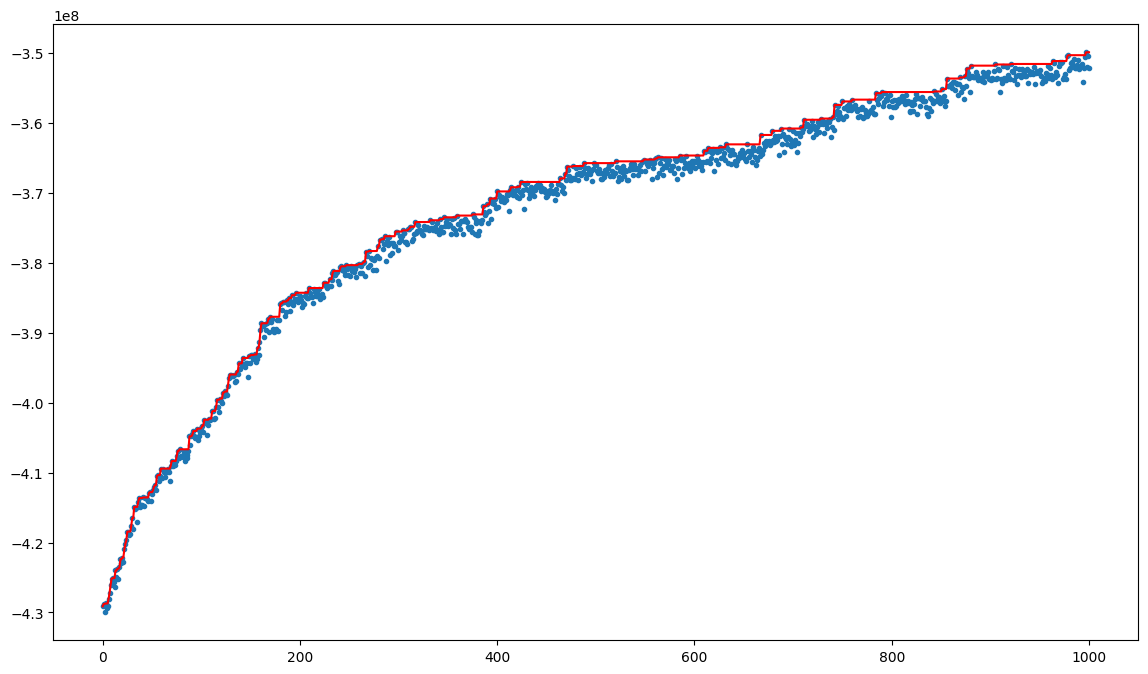

In [35]:
solution, history = hill_climbing_multiple_mutation(half_solution())
ic(fitness(solution))
ic(history.index(fitness(solution)))

plt.figure(figsize=(14, 8))
plt.plot(
    range(len(history)),
    list(accumulate(history, max)),
    color="red",
)
_ = plt.scatter(range(len(history)), history, marker=".")